# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

(array([ 2.,  0.,  2.,  1.,  2.,  3.,  4.,  5.,  6.,  3., 12., 11., 13.,
         5., 12., 10., 18.,  2.,  8.,  3.,  4.,  1.,  0.,  0.,  2.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 96.3 ,  96.45,  96.6 ,  96.75,  96.9 ,  97.05,  97.2 ,  97.35,
         97.5 ,  97.65,  97.8 ,  97.95,  98.1 ,  98.25,  98.4 ,  98.55,
         98.7 ,  98.85,  99.  ,  99.15,  99.3 ,  99.45,  99.6 ,  99.75,
         99.9 , 100.05, 100.2 , 100.35, 100.5 , 100.65, 100.8 ]),
 <a list of 30 Patch objects>)

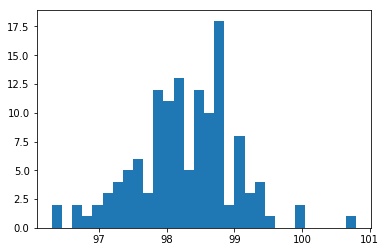

In [8]:
#1a. Plotting Histogram of data. Looks relatively normal with some differences at the tails
import matplotlib.pyplot as plt
plt.hist('temperature',data=df, bins=30)

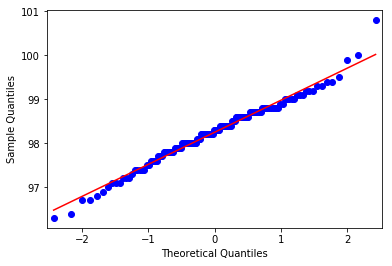

In [9]:
#1b. Q-Q Plot looks normallywith some variation at the extremes, similar to histogram above

from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(df['temperature'], line='s')
pyplot.show()

In [21]:
#2. 130 observations in the dataset. Reasonably large to be normally distributed. Dataset are independent observations
len(df)

130

In [43]:
import numpy as np
observed_mean=np.mean(df.temperature)
observed_mean
#observed mean is already lower than 98.6

98.24923076923078

In [42]:
#3a. Bootstrap hypothesis test
data=df.temperature
means=np.empty(1000)
for i in range(1000):
    observations=np.empty(100)
    for j in range(100):
        observations[j]=np.random.choice(data)
    means[i]=np.mean(observations)
means
observations

array([98.2, 99. , 99.3, 98.6, 97.4, 97.7, 98.8, 98.6, 98.4, 98.2, 98.7,
       97.8, 97.1, 98.3, 98.8, 99.4, 97.1, 97.8, 98.8, 99. , 98.6, 99.2,
       98.8, 97.6, 98.6, 98.1, 97.4, 98.6, 99. , 98.9, 98. , 97.8, 97.2,
       97.8, 97.3, 97.4, 97.8, 99.3, 98.8, 98.4, 99.9, 98.8, 97.4, 98. ,
       98.2, 97.6, 97.6, 97.7, 98.4, 98.2, 97.2, 98.6, 98.5, 97.4, 98.2,
       97.6, 98.8, 98. , 98.3, 97.6, 99.4, 98.7, 98.2, 97.8, 99.1, 97.7,
       97.8, 99.3, 98.4, 98. , 97. , 97.8, 98.8, 97.5, 97.6, 98.2, 97.1,
       98.8, 97.9, 97.1, 97.9, 98.8, 98. , 98. , 98.4, 98.4, 97.6, 97.9,
       96.7, 98.7, 97.7, 97.8, 99.1, 97.1, 97.3, 98.4, 98.5, 98.7, 98.4,
       98.8])

In [45]:
In all of our samples, the bootstrapped mean is <98.6, showing that the mean is likely not 98.6
p=np.sum(means<98.6)/len(means)
p

1.0

In [64]:
#3b. Frequentist hypothesis test. Will use one sample because we're comparing to a null hypothesis (pop. mean =96.8) as opposed to another group of observations
#Will use Z test because more than 30 samples
#Null hypothesis, pop. mean = 98.6. Alternate hypothesis, pop.mean not equal to 98.6. Alpha of .05, which means if Z>1.96 or Z<-1.96 we reject
temp_mean=np.mean(data)
temp_std=np.std(data)
print(temp_mean)
print(temp_std)
z= (temp_mean-98.6)/(temp_std/np.sqrt(len(data)))
print(z)
#With Z>1.96, we reject the null hypothesis and say the population mean is not 98.6. Conclusion is the same

98.24923076923078
0.7303577789050377
-5.475925202078116


In [65]:
#4. Smaller sample, using t-test because sample size is smaller than 30
sample=np.empty(10)
for i in range(10):
    sample[i]=np.random.choice(data)
sample

array([99.5, 99.4, 98. , 98.4, 98.2, 99.3, 99.1, 97.6, 98.2, 98.7])

In [70]:
sample_mean=np.mean(sample)
sample_std=np.std(sample)
test_stat=(sample_mean-98.6)/(sample_std/np.sqrt(len(sample)))
#Finding test statistic with 9 degrees of freedom and .05 on two sided test gives 2.262 for null hypothesis. so if we're greater than 2.262 or less than - 2.262, we reject
test_stat
#therefore, we do not reject the null hypothesis in this case
#clearly this smaller sample size made it harder to reject the null hypothesis and gave us a different answer

0.20244408254483248

In [71]:
#5a. Calculating 95% conf int for temperature mean using bootstrap
means=np.empty(1000)
for i in range(1000):
    observations=np.empty(100)
    for j in range(100):
        observations[j]=np.random.choice(data)
    means[i]=np.mean(observations)
conf_int=np.percentile(means,[2.5,97.5])
conf_int
#Any temperature outside of 98.101 and 98.4 should be considered abnormal

array([98.101, 98.4  ])

In [74]:
#5b. Calcuating 95% conf int for temperature mean using frequentist
conf_int_upper=temp_mean+(1.96)*(temp_std/np.sqrt(len(data)))
conf_int_lower=temp_mean-(1.96)*(temp_std/np.sqrt(len(data)))
print(conf_int_upper)
print(conf_int_lower)

98.37478173403336
98.12367980442819


In [90]:
#6. Difference in temperature between males and females. 65 of each so can do two sample z-test. 
#Null hypothesis is absolute value of male pop. mean - female pop.mean = 0. With 95% confidence, Z can't out of +- 1.96
print(df.gender.value_counts())
data_male=df[df.gender=='M']
data_male
data_female=df[df.gender=='F']
Z=(np.mean(data_male)-np.mean(data_female))/(np.sqrt((np.var(data_male)/len(data_male))+(np.var(data_female)/len(data_female))))
print(Z)
#Since temperature's Z-statistic is <1.96, we reject the null hypothesis and say there is a difference between male and female temperatures


M    65
F    65
Name: gender, dtype: int64
temperature   -2.303220
heart_rate    -0.636824
dtype: float64
